In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/"
#file_name = "cleanedvehicles.csv"
file_name1 = "cleanedvehicles_rev1.csv"
file_name2 = "cleanvehicles_rev2.csv"

In [ ]:
df = pd.read_csv(file_path + file_name1)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
no_manu = df.loc[(df['manufacturer'].isna())].index
icount = len(no_manu)-1

In [ ]:
impute_manufacturer = ['acura','alfa-romeo','aston-martin','audi',
                        'bmw','buick','cadillac','chevrolet','chrysler',
                        'datsun','dodge','ev','ferrari','fiat','ford','freightliner','gmc',
                        'harley-davidson','honda','hummer','hyundai','infiniti','isuzu',
                        'jaguar','jeep','kia','lamborghini','land rover',
                        'lexus','lincoln','maserati','mazda','mercedes-benz',
                        'mercury','mini','mitsubishi','nissan','oldsmobile','peterbilt','plymouth','pontiac',
                        'porsche','saab','saturn','scion','smart','subaru','suzuki','tesla','toyota',
                        'volkswagen','volvo']

In [ ]:
while icount >= 0:
    df_model = str(df.loc[no_manu[icount]]['model'])
    parse_model = df_model.split(' ')
    iicount = len(parse_model)-1
    while iicount >= 0:
        if (str(parse_model[iicount]).lower() in str(impute_manufacturer).lower()) == True:
            df.loc[[no_manu[icount]],'manufacturer']=str(parse_model[iicount]).lower()
            new_model = df_model.replace(parse_model[iicount],'')
            df.loc[[no_manu[icount]],'model']=str(new_model).lower()
            iicount = 0
        iicount = iicount - 1
    icount = icount - 1

In [ ]:
df.drop(df.index[(df['manufacturer'].isna())],inplace=True)
df.drop(df.index[(df['model'].isna())],inplace=True)

In [ ]:
#There are a lot of incorrect manufacturers records.
#Delete manufacturers whose sales are smaller than 50 cars 
manu_valuecounts=df['manufacturer'].value_counts()

In [ ]:
manu_to_remove = manu_valuecounts[manu_valuecounts <= 50].index

In [ ]:
df = df[~df.manufacturer.isin(manu_to_remove)]

In [ ]:
df['manufacturer'].unique()

array(['honda', 'chevrolet', 'toyota', 'nissan', 'ford', 'bmw', 'buick',
       'dodge', 'hyundai', 'lexus', 'infiniti', 'pontiac', 'jaguar',
       'volkswagen', 'mercedes-benz', 'rover', 'chrysler', 'kia',
       'cadillac', 'jeep', 'gmc', 'audi', 'mazda', 'maserati', 'fiat',
       'subaru', 'acura', 'saturn', 'smart', 'mitsubishi', 'mercury',
       'hummer', 'mini', 'scion', 'isuzu', 'volvo', 'lincoln', 'saab',
       'suzuki', 'porsche', 'oldsmobile', 'freightliner', 's', 'plymouth',
       'olet', 'alfa-romeo'], dtype=object)

In [ ]:
# Remove undefined manufacturer 's'
df.drop(df.index[(df['manufacturer']=='s')],inplace=True)

In [ ]:
df['manufacturer'].unique()

array(['honda', 'chevrolet', 'toyota', 'nissan', 'ford', 'bmw', 'buick',
       'dodge', 'hyundai', 'lexus', 'infiniti', 'pontiac', 'jaguar',
       'volkswagen', 'mercedes-benz', 'rover', 'chrysler', 'kia',
       'cadillac', 'jeep', 'gmc', 'audi', 'mazda', 'maserati', 'fiat',
       'subaru', 'acura', 'saturn', 'smart', 'mitsubishi', 'mercury',
       'hummer', 'mini', 'scion', 'isuzu', 'volvo', 'lincoln', 'saab',
       'suzuki', 'porsche', 'oldsmobile', 'freightliner', 'plymouth',
       'olet', 'alfa-romeo'], dtype=object)

In [ ]:
df.year = df.year.astype(int)
df.odometer = df.odometer.astype(int)

In [ ]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,description,state,lat,long
0,greensboro,3995,2004,honda,element,excellent,4 cylinders,gas,212526,clean,automatic,fwd,SUV,2004 Honda Element LX 4dr SUV Offered by: ...,nc,35.7636,-78.7443
1,greensboro,10995,2014,chevrolet,traverse,like new,6 cylinders,gas,112383,clean,automatic,fwd,SUV,2014 Chevrolet Chevy Traverse LT 4dr SUV w/1LT...,nc,35.7636,-78.7443
2,greensboro,8995,2005,toyota,tacoma,new,6 cylinders,gas,181020,clean,automatic,rwd,other,2005 Toyota Tacoma PreRunner V6 4dr Access Cab...,nc,35.7636,-78.7443
3,greensboro,7995,2008,nissan,frontier,new,6 cylinders,gas,162214,clean,automatic,fwd,pickup,2008 Nissan Frontier SE V6 4x2 4dr Crew Cab 6....,nc,35.7636,-78.7443
4,greensboro,5495,2008,ford,edge,like new,6 cylinders,gas,139904,clean,automatic,awd,SUV,2008 Ford Edge SEL AWD 4dr Crossover Offer...,nc,35.7636,-78.7443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255763,syracuse,6300,2014,nissan,altima,good,4 cylinders,gas,85000,clean,automatic,fwd,sedan,2014 Nissan Altima with 85k miles with push bu...,ny,43.1099,-76.1870
255764,greensboro,8495,2008,acura,mdx,like new,6 cylinders,gas,147718,clean,automatic,awd,SUV,2008 Acura MDX SH AWD w/Tech 4dr SUV w/Technol...,nc,35.7636,-78.7443
255765,denver,5295,2006,audi,a4 2.0t avant quattro,excellent,4 cylinders,gas,150000,clean,automatic,4wd,wagon,This Is a Nice Looking Audi!! Beautiful 2006...,co,39.6575,-104.7850
255766,greensboro,13995,2016,nissan,frontier,like new,6 cylinders,gas,97545,clean,automatic,4wd,pickup,2016 Nissan Frontier SV V6 4x4 4dr King Cab 6....,nc,35.7636,-78.7443


In [ ]:
#Examine categorical variables 
#clean 'other' in categorical variables 
df.cylinders.value_counts()

6 cylinders     88909
4 cylinders     86528
8 cylinders     74277
5 cylinders      2285
10 cylinders     1286
3 cylinders       882
other             317
12 cylinders       91
Name: cylinders, dtype: int64

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("3 cyl", case=False)),'cylinders']='3 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("3cyl", case=False)),'cylinders']='3 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" v3 ", case=False)),'cylinders']='3 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" I3 ", case=False)),'cylinders']='3 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("4 cyl", case=False)),'cylinders']='4 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" v4 ", case=False)),'cylinders']='4 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("4cyl", case=False)),'cylinders']='4 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" I4 ", case=False)),'cylinders']='4 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("5 cyl", case=False)),'cylinders']='5 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("5cyl", case=False)),'cylinders']='5 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" v5 ", case=False)),'cylinders']='5 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" I5 ", case=False)),'cylinders']='5 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("6 cyl", case=False)),'cylinders']='6 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("6cyl", case=False)),'cylinders']='6 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" v6 ", case=False)),'cylinders']='6 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" I6 ", case=False)),'cylinders']='6 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" L6", case=False)),'cylinders']='6 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("8 cyl", case=False)),'cylinders']='8 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("8cyl", case=False)),'cylinders']='8 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" v8 ", case=False)),'cylinders']='8 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("10 cyl", case=False)),'cylinders']='10 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("10cyl", case=False)),'cylinders']='10 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" v10 ", case=False)),'cylinders']='10 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("12 cyl", case=False)),'cylinders']='12 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains("12cyl", case=False)),'cylinders']='12 cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" v12 ", case=False)),'cylinders']='12 cylinders'

In [ ]:
df.cylinders.value_counts()

6 cylinders     88918
4 cylinders     86536
8 cylinders     74285
5 cylinders      2285
10 cylinders     1286
3 cylinders       892
other             282
12 cylinders       91
Name: cylinders, dtype: int64

In [ ]:
# Electric car doesn't have cylinders
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" EV ", case=False)),'cylinders']='no_cylinders'

In [ ]:
df.loc[(df['cylinders']=='other')&(df['description'].str.contains(" electric ", case=False)),'cylinders']='no_cylinders'

In [ ]:
df.cylinders.value_counts()
# It needs to be further cleaned based on fuel

6 cylinders     88918
4 cylinders     86536
8 cylinders     74285
5 cylinders      2285
10 cylinders     1286
3 cylinders       892
other             219
12 cylinders       91
no_cylinders       63
Name: cylinders, dtype: int64

In [ ]:
#Examine fuel
df.fuel.value_counts()

gas         227778
diesel       18674
other         5531
hybrid        2311
electric       281
Name: fuel, dtype: int64

In [ ]:
fuel_list=['gas', 'diesel','hybrid']

for f in fuel_list:
  df.loc[(df['fuel']=='other')&(df['description'].str.contains(f, case=False)),'fuel']=f

In [ ]:
df.fuel.value_counts()

gas         228746
diesel       19374
other         3517
hybrid        2657
electric       281
Name: fuel, dtype: int64

In [ ]:
# there is no electric car before 2008
df.loc[(df['fuel']=='electric')&(df['year']<2008),'fuel']='gas'

In [ ]:
df.loc[(df['fuel']=='electric')&(df['cylinders']=='6 cylinders'), 'fuel']='gas'

In [ ]:
df.loc[(df['fuel']=='electric')&(df['cylinders']=='8 cylinders'), 'fuel']='gas'

In [ ]:
#nissan leaf is all electric car
df.loc[(df['fuel']=='electric')&(df['cylinders']=='4 cylinders')&(df['manufacturer']=='nissan'),'cylinders']='no_cylinders'

In [ ]:
df.loc[(df['fuel']=='electric')&(df['cylinders']=='4 cylinders')].groupby('manufacturer').count()

,region,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,description,state,lat,long
manufacturer,,,,,,,,,,,,,,,,
audi,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
cadillac,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
chevrolet,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
ford,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
honda,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
jeep,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
mini,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
saturn,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
subaru,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Toyota uses hybrid technique 
df.loc[(df['fuel']=='electric')&(df['cylinders']=='4 cylinders')&(df['manufacturer']=='toyota'),'fuel']='hybrid'

In [ ]:
#Honda uses hybrid technique 
df.loc[(df['fuel']=='electric')&(df['cylinders']=='4 cylinders')&(df['manufacturer']=='honda'),'fuel']='hybrid'

In [ ]:
df.loc[(df['fuel']=='electric')&(df['cylinders']=='4 cylinders')&(df['manufacturer']!='ford')&(df['manufacturer']!='chevrolet')&(df['manufacturer']!='audi'),'fuel']='gas'

In [ ]:
df.loc[(df['fuel']=='electric')&(df['cylinders']=='other'),'cylinders']='no_cylinders'

In [ ]:
df.loc[(df['fuel']=='other')].groupby('cylinders').count()

,region,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,description,state,lat,long
cylinders,,,,,,,,,,,,,,,,
3 cylinders,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4 cylinders,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522,522
6 cylinders,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176
8 cylinders,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809
other,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [ ]:
# these are PHEV. Electric fuel include EV and PHEV
df.loc[(df['fuel']=='other')&(df['cylinders']=='3 cylinders'),'fuel']='electric'

In [ ]:
# Old cars usually have 6 cylinders, while new cars usually have 4 cylinders 
df.loc[(df['fuel']=='other')&(df['cylinders']=='other')&(df['year']<2002),'cylinders']='6 cylinders'
df.loc[(df['fuel']=='other')&(df['cylinders']=='other')&(df['year']>=2002),'cylinders']='4 cylinders'

In [ ]:
#Set rest records to gas fuel
df.loc[(df['fuel']=='other'),'fuel']='gas'

In [ ]:
df.cylinders.value_counts()

6 cylinders     88920
4 cylinders     86532
8 cylinders     74285
5 cylinders      2285
10 cylinders     1286
3 cylinders       892
other             192
no_cylinders       92
12 cylinders       91
Name: cylinders, dtype: int64

In [ ]:
df.loc[(df['cylinders']=='other')].groupby('fuel').count()

,region,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,description,state,lat,long
fuel,,,,,,,,,,,,,,,,
diesel,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
gas,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
hybrid,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
#The engines of hybrid cars usually have 4 cylinders 
df.loc[(df['cylinders']=='other')&(df['fuel']=='hybrid'),'cylinders']='4 cylinders'

In [ ]:
df.drop(df[df.cylinders=='other'].index, inplace=True)

In [ ]:
df.cylinders.value_counts()

6 cylinders     88920
4 cylinders     86539
8 cylinders     74285
5 cylinders      2285
10 cylinders     1286
3 cylinders       892
no_cylinders       92
12 cylinders       91
Name: cylinders, dtype: int64

In [ ]:
df.fuel.value_counts()

gas         232199
diesel       19306
hybrid        2670
electric       215
Name: fuel, dtype: int64

In [ ]:
#Examine ttile tatus
df.title_status.value_counts()

clean         242935
rebuilt         6768
salvage         2634
lien            1928
missing           92
parts only        33
Name: title_status, dtype: int64

In [ ]:
title_list=list(df.title_status.value_counts().index)
title_list.remove('missing')

In [ ]:
for title in title_list:
  df.loc[(df['title_status']=='missing')&(df['description'].str.contains(title, case=False)),'title_status']=title

In [ ]:
df.title_status.value_counts()

clean         242950
rebuilt         6773
salvage         2636
lien            1930
missing           66
parts only        35
Name: title_status, dtype: int64

In [ ]:
# There are only 66 records with no title_status. So we can simply drop it
df.drop(df[df.title_status=='missing'].index, inplace=True)

In [ ]:
df.title_status.value_counts()

clean         242950
rebuilt         6773
salvage         2636
lien            1930
parts only        35
Name: title_status, dtype: int64

In [ ]:
# Examine transimission
df.transmission.value_counts()

automatic    223640
other         16219
manual        14465
Name: transmission, dtype: int64

In [ ]:
trans_list=['automatic', 'manual']

for trans in trans_list:
  df.loc[(df['transmission']=='other')&(df['description'].str.contains(trans, case=False)),'transmission']=trans

In [ ]:
df.transmission.value_counts()

automatic    238188
manual        14785
other          1351
Name: transmission, dtype: int64

In [ ]:
# Set CVT another category in transmission 
df.loc[(df['description'].str.contains('continuously variable', case=False)),'transmission']='CVT'

In [ ]:
df.loc[(df['description'].str.contains('cvt', case=False)),'transmission']='CVT'

In [ ]:
df.transmission.value_counts()

automatic    229675
manual        14711
CVT            9102
other           836
Name: transmission, dtype: int64

In [ ]:
df.loc[(df['transmission']=='other')].groupby('fuel').count()

,region,price,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,description,state,lat,long
fuel,,,,,,,,,,,,,,,,
diesel,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
electric,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
gas,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755,755
hybrid,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23


In [ ]:
# electric car or hybrid car usually uses E-CVT or CVT
df.loc[(df['fuel']=='electric'),'transmission']='CVT'
df.loc[(df['fuel']=='hybrid'),'transmission']='CVT'

In [ ]:
# Rest records can be imputed to automatic
df.loc[(df['transmission']=='other'),'transmission']='automatic'

In [ ]:
df.transmission.value_counts()

automatic    228364
manual        14696
CVT           11264
Name: transmission, dtype: int64

In [ ]:
#Examine drive
df.drive.value_counts()

4wd    110206
fwd     86135
rwd     47906
awd     10077
Name: drive, dtype: int64

In [ ]:
#Examine type of cars 
df.type.value_counts()

SUV            64270
sedan          60216
pickup         41829
truck          27844
coupe          14523
other          10316
hatchback       9715
wagon           7580
van             6975
convertible     5822
mini-van        4415
offroad          554
bus              265
Name: type, dtype: int64

In [ ]:
type_list=list(df.type.value_counts().index)

In [ ]:
type_list.remove('other')

In [ ]:
for t in type_list:
  df.loc[(df['type']=='other')&(df['description'].str.contains(t, case=False)),'type']=t

In [ ]:
df.type.value_counts()

SUV            70986
sedan          60585
pickup         41944
truck          28233
coupe          15403
hatchback       9797
van             8191
wagon           7582
convertible     5843
mini-van        4415
offroad          554
other            512
bus              279
Name: type, dtype: int64

In [ ]:
df.loc[(df['type']=='other')&(df['description'].str.contains('hatch', case=False)),'type']='hatchback'
df.loc[(df['type']=='other')&(df['description'].str.contains('van', case=False)),'type']='mini-van'

In [ ]:
df.loc[(df['type']=='other')&(df['description'].str.contains('sdn', case=False)),'type']='sedan'

In [ ]:
df.type.value_counts()

SUV            70986
sedan          60596
pickup         41944
truck          28233
coupe          15403
hatchback       9800
van             8191
wagon           7582
convertible     5843
mini-van        4415
offroad          554
other            498
bus              279
Name: type, dtype: int64

In [ ]:
 df.loc[(df['type']=='other')&(df['drive']=='awd'), 'type']='SUV'

In [ ]:
 df.loc[(df['type']=='other')&(df['description'].str.contains('duty', case=False)),'type']='pickup'

In [ ]:
df.loc[(df['type']=='other')&(df['description'].str.contains('4X4', case=False)),'type']='pickup'

In [ ]:
 df.loc[(df['type']=='other')&(df.manufacturer=='jeep'),'type']='SUV'

In [ ]:
 df.loc[(df['type']=='other')&(df['drive']=='4wd'),'type']='SUV'

In [ ]:
# rest FWD or RWD cars are assgined to sedan
df.loc[(df['type']=='other'),'type']='sedan'

In [ ]:
df.type.value_counts()

SUV            71138
sedan          60915
pickup         41971
truck          28233
coupe          15403
hatchback       9800
van             8191
wagon           7582
convertible     5843
mini-van        4415
offroad          554
bus              279
Name: type, dtype: int64

In [ ]:
df.drop(['model'],axis=1, inplace=True)

In [ ]:
df.drop(['description'],axis=1, inplace=True)

In [ ]:
df.replace(' ', '_', regex=True, inplace=True)

In [ ]:
df.cylinders.value_counts()

6_cylinders     88896
4_cylinders     86527
8_cylinders     74256
5_cylinders      2285
10_cylinders     1286
3_cylinders       891
no_cylinders       92
12_cylinders       91
Name: cylinders, dtype: int64

In [ ]:
df.condition.value_counts()

good         111561
excellent    100635
like_new      21703
new           12803
fair           6654
salvage         968
Name: condition, dtype: int64

In [ ]:
df.to_csv(file_path+'cleanedvehicles_rev2.csv',index=False)

In [ ]:
df.title_status.value_counts()

clean         242950
rebuilt         6773
salvage         2636
lien            1930
parts_only        35
Name: title_status, dtype: int64

In [ ]:
df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long
0,greensboro,3995,2004,honda,excellent,4_cylinders,gas,212526,clean,automatic,fwd,SUV,nc,35.7636,-78.7443
1,greensboro,10995,2014,chevrolet,like_new,6_cylinders,gas,112383,clean,automatic,fwd,SUV,nc,35.7636,-78.7443
2,greensboro,8995,2005,toyota,new,6_cylinders,gas,181020,clean,automatic,rwd,pickup,nc,35.7636,-78.7443
3,greensboro,7995,2008,nissan,new,6_cylinders,gas,162214,clean,automatic,fwd,pickup,nc,35.7636,-78.7443
4,greensboro,5495,2008,ford,like_new,6_cylinders,gas,139904,clean,automatic,awd,SUV,nc,35.7636,-78.7443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255763,syracuse,6300,2014,nissan,good,4_cylinders,gas,85000,clean,automatic,fwd,sedan,ny,43.1099,-76.1870
255764,greensboro,8495,2008,acura,like_new,6_cylinders,gas,147718,clean,automatic,awd,SUV,nc,35.7636,-78.7443
255765,denver,5295,2006,audi,excellent,4_cylinders,gas,150000,clean,automatic,4wd,wagon,co,39.6575,-104.7850
255766,greensboro,13995,2016,nissan,like_new,6_cylinders,gas,97545,clean,automatic,4wd,pickup,nc,35.7636,-78.7443


In [ ]:
# Now I am going to do pipeline
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
df_pip=pd.read_csv(file_path+'cleanedvehicles_rev2.csv')

In [6]:
df_pip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254324 entries, 0 to 254323
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        254324 non-null  object 
 1   price         254324 non-null  int64  
 2   year          254324 non-null  int64  
 3   manufacturer  254324 non-null  object 
 4   condition     254324 non-null  object 
 5   cylinders     254324 non-null  object 
 6   fuel          254324 non-null  object 
 7   odometer      254324 non-null  int64  
 8   title_status  254324 non-null  object 
 9   transmission  254324 non-null  object 
 10  drive         254324 non-null  object 
 11  type          254324 non-null  object 
 12  state         254324 non-null  object 
 13  lat           254324 non-null  float64
 14  long          254324 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 29.1+ MB


In [7]:
# Outliers in Price

# The most expensive car (source: Google) right now is US$4.36 million. Yet there are 15 above this in the dataset! Assume outside this limit = bad data.
# How to select the outlier cutpoint? AutoTrader sets their cutpoint to 200,000. Kijiji only has 444 results in Canada about 400,000.
# In reviewing the 99th percentile, many legitimate postings were included. We decided not to use a percentile cutpoint.
# Therefore we will choose to consider all cars above $200,000 as outliers that we assume will be more negative to include than exclude in the model.

# Cars above $4M
df_pip.loc[df_pip.price >= 4_000_000].shape[0]
# Cars in the 99th percentile
df_pip.loc[df_pip.price >= df_pip.price.quantile(.99)]
# Drop cars above $200K
df_pip = df_pip.drop(df_pip.loc[df_pip.price > 200_000].index)

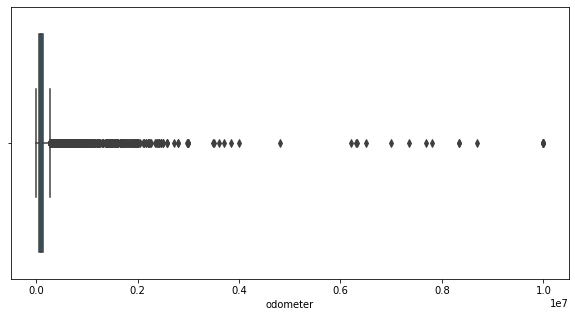

In [8]:
# Outlier in Odometer
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="odometer", data=df_pip)

In [9]:
# We need to remove cars with odometer of higher than 300,000 miles
df_pip = df_pip.drop(df_pip.loc[df_pip.odometer > 300000].index)

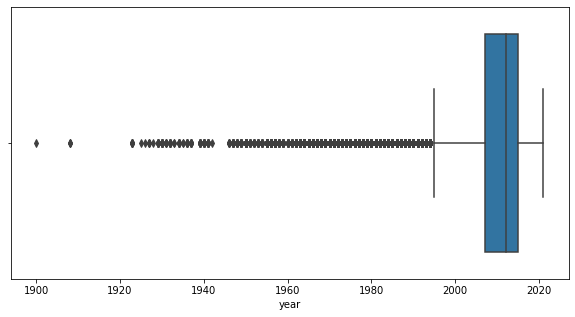

In [10]:
# Outlier in Year
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="year", data=df_pip)

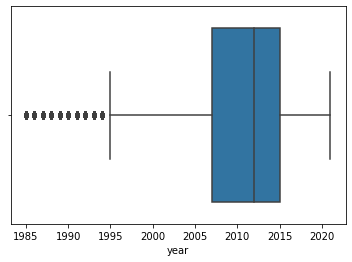

In [11]:
ax = sns.boxplot(x="year", data=df_pip.loc[df_pip.year >= df_pip.year.quantile(.01)])

In [12]:
#Drop the cars with years of earlier than 1985
df_pip = df_pip.drop(df_pip.loc[df_pip.year <1985].index)

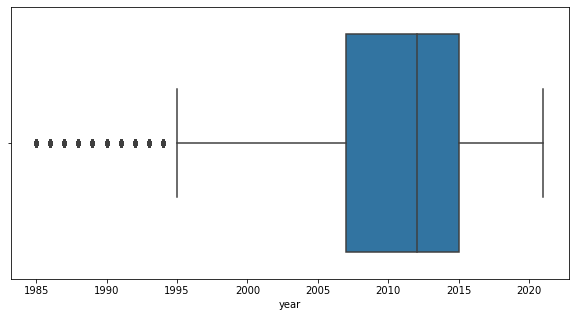

In [14]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="year", data=df_pip)

In [15]:
df_pip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250573 entries, 0 to 254323
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        250573 non-null  object 
 1   price         250573 non-null  int64  
 2   year          250573 non-null  int64  
 3   manufacturer  250573 non-null  object 
 4   condition     250573 non-null  object 
 5   cylinders     250573 non-null  object 
 6   fuel          250573 non-null  object 
 7   odometer      250573 non-null  int64  
 8   title_status  250573 non-null  object 
 9   transmission  250573 non-null  object 
 10  drive         250573 non-null  object 
 11  type          250573 non-null  object 
 12  state         250573 non-null  object 
 13  lat           250573 non-null  float64
 14  long          250573 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 30.6+ MB


Text(0, 0.5, 'Price (US$)')

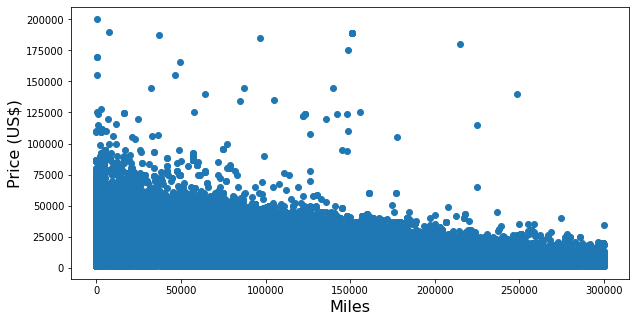

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_pip.odometer, y=df_pip.price)
plt.xlabel('Miles', fontsize=16)
plt.ylabel('Price (US$)', fontsize=16)

Text(0, 0.5, 'Price (US$)')

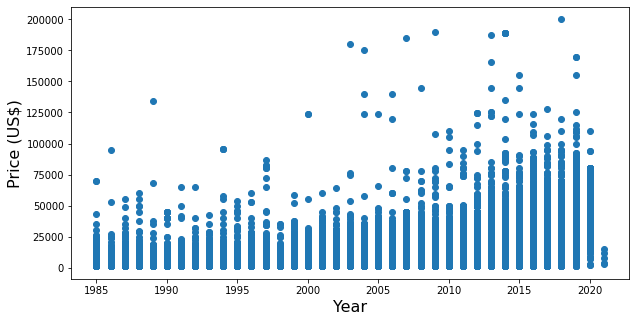

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_pip.year, y=df_pip.price)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price (US$)', fontsize=16)

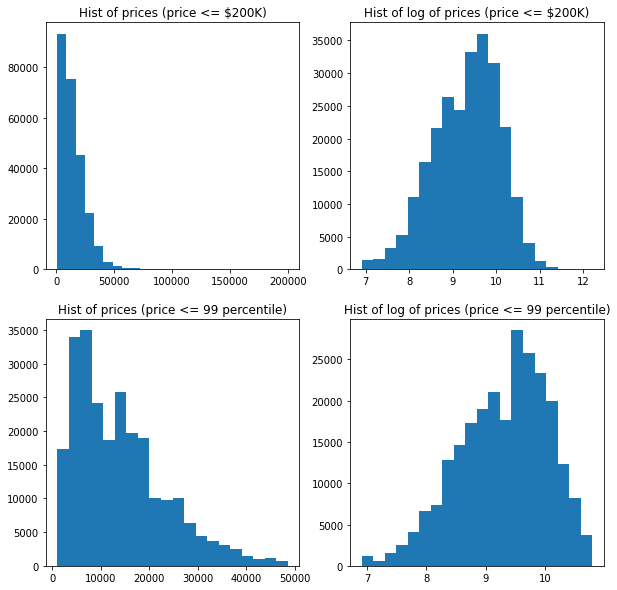

In [18]:
# Now visualize the distribution of prices
# df.price.hist(bins=50)
# It's difficult to visualize the distribution of prices with the long tail of large, rare prices.
# Upon inspection, there are cars caught in the 99th percentile in the $50k price range. Drop the 99th percentile, but in a copy of the df.
df_o = df_pip.drop(df_pip.loc[df_pip.price >= df_pip.price.quantile(.99)].index)
# It looks like there is a second, smaller peak in the data. Let's see a density plot.
# sns.kdeplot(df_o.price)
# The prices seem to be somewhat exponentially distributed. Plot the log of the prices and check if the log values are normally distributed.
# sns.kdeplot(np.log(df.price))
# The log distribution of price is normally distributed and left-skewed.

# Visualize findings
fig, axes = plt.subplots(2, 2, figsize=[10,10])

axes[0, 0].set_title('Hist of prices (price <= $200K)')
axes[0, 0].hist(df_pip.price, bins=25)

axes[0, 1].set_title('Hist of log of prices (price <= $200K)')
axes[0, 1].hist(np.log(df_pip.price), bins=20)

axes[1, 0].set_title('Hist of prices (price <= 99 percentile)')
axes[1, 0].hist(df_o.price, bins=20)

axes[1, 1].set_title('Hist of log of prices (price <= 99 percentile)')
axes[1, 1].hist(np.log(df_o.price), bins=20)

plt.show()
# As we see, the 99th percentile of price had a dramatic effect on the distribution of the price data.

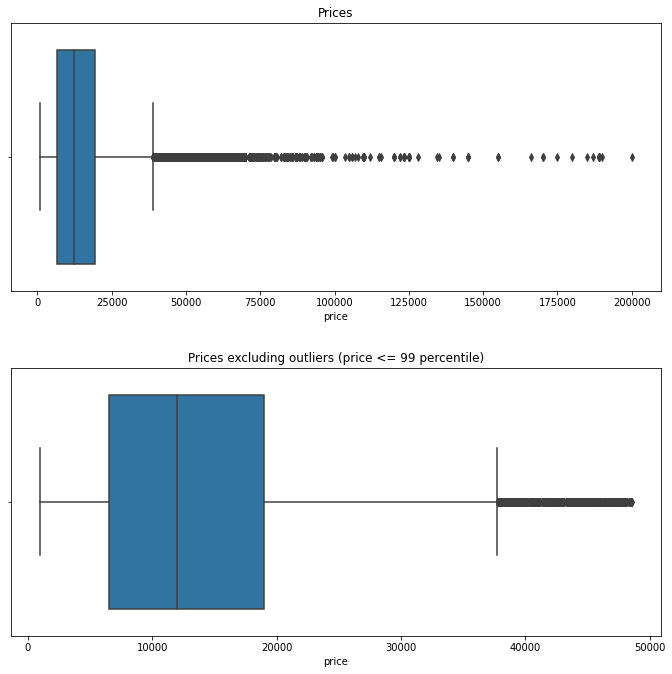

In [19]:
fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="price", data=df_pip)
axes[0].set_title("Prices")

sns.boxplot(ax=axes[1], x="price", data=df_o)
axes[1].set_title("Prices excluding outliers (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

In [20]:
df_o.describe()

,price,year,odometer,lat,long
count,248067.000000,248067.000000,248067.000000,248067.00000,248067.00000
mean,13940.940552,2010.892106,99688.521512,38.55708,-93.26831
std,9323.642095,5.670662,59432.399563,5.68233,17.48886
min,1000.000000,1985.000000,0.000000,-77.79050,-166.37700
25%,6495.000000,2007.000000,49958.000000,34.25430,-105.09200
50%,11999.000000,2012.000000,96283.000000,39.30000,-86.79200
75%,18999.000000,2015.000000,140000.000000,42.41880,-80.67170
max,48545.000000,2021.000000,300000.000000,84.51480,94.12480


In [24]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248067 entries, 0 to 254323
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        248067 non-null  object 
 1   price         248067 non-null  int64  
 2   year          248067 non-null  int64  
 3   manufacturer  248067 non-null  object 
 4   condition     248067 non-null  object 
 5   cylinders     248067 non-null  object 
 6   fuel          248067 non-null  object 
 7   odometer      248067 non-null  int64  
 8   title_status  248067 non-null  object 
 9   transmission  248067 non-null  object 
 10  drive         248067 non-null  object 
 11  type          248067 non-null  object 
 12  state         248067 non-null  object 
 13  lat           248067 non-null  float64
 14  long          248067 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 30.3+ MB


Text(0, 0.5, 'Price (US$)')

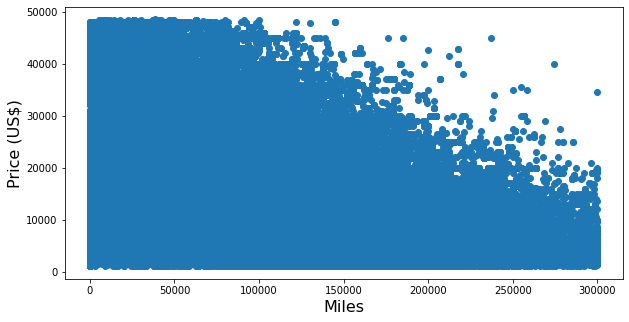

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_o.odometer, y=df_o.price)
plt.xlabel('Miles', fontsize=16)
plt.ylabel('Price (US$)', fontsize=16)

Text(0, 0.5, 'Price (US$)')

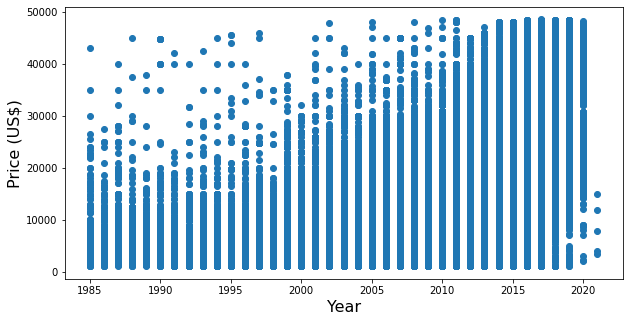

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(x=df_o.year, y=df_o.price)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price (US$)', fontsize=16)

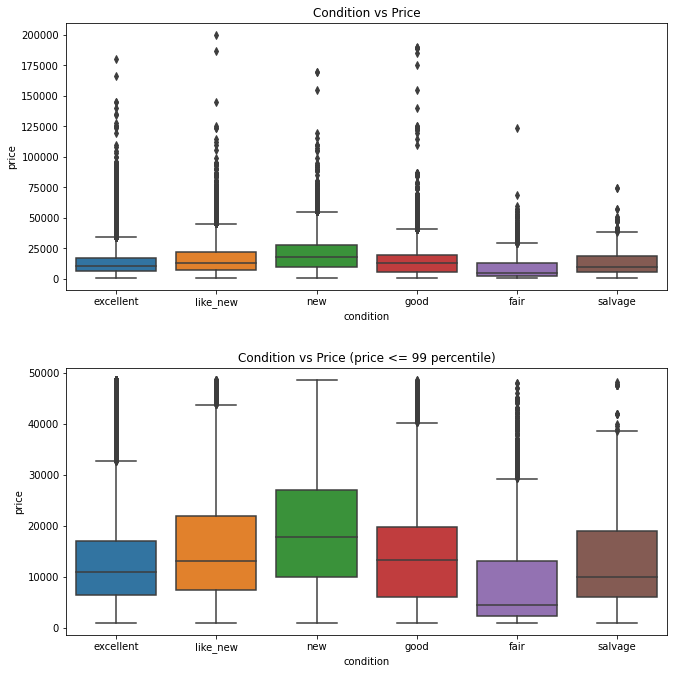

In [130]:
# Look at relationship between Condition and Price
fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="condition", y="price", data=df_pip)
axes[0].set_title("Condition vs Price")

sns.boxplot(ax=axes[1], x="condition", y="price", data=df_o)
axes[1].set_title("Condition vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

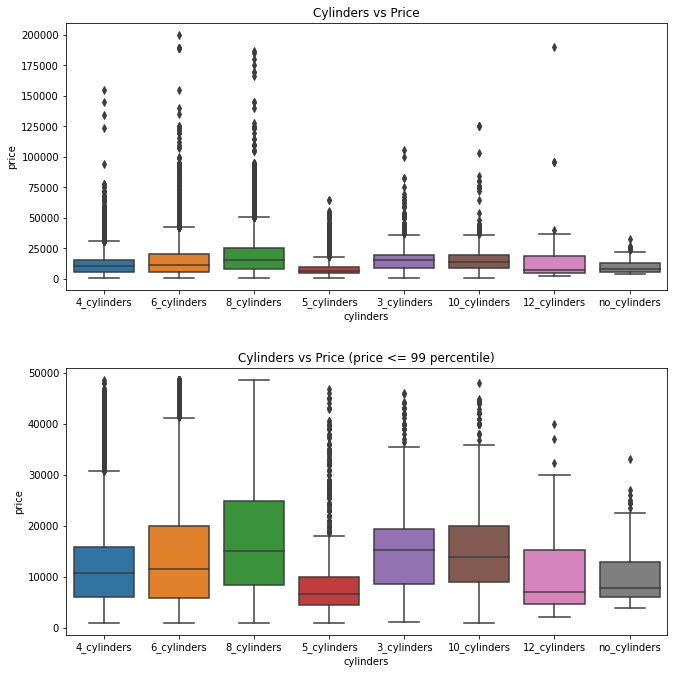

In [131]:
# Look at the relationship between price and cylinders

fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="cylinders", y="price", data=df_pip)
axes[0].set_title("Cylinders vs Price")

sns.boxplot(ax=axes[1], x="cylinders", y="price", data=df_o)
axes[1].set_title("Cylinders vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

In [32]:
df_o.loc[df_o['title_status']== 'lien'].groupby(['year']).count()

,region,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat,long
year,,,,,,,,,,,,,,
1986,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1987,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1991,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1992,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1994,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1997,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1998,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1999,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2000,5,5,5,5,5,5,5,5,5,5,5,5,5,5


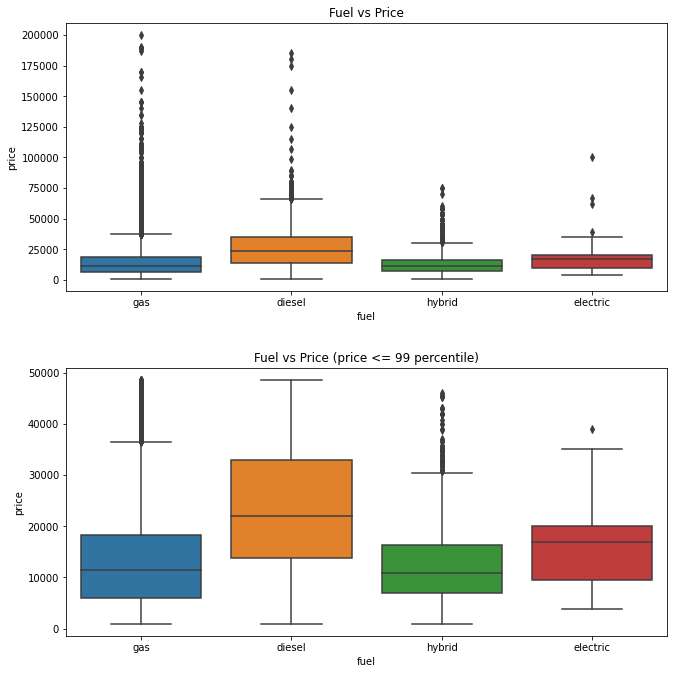

In [132]:
# Look at the relationship between price and fuels

fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="fuel", y="price", data=df_pip)
axes[0].set_title("Fuel vs Price")

sns.boxplot(ax=axes[1], x="fuel", y="price", data=df_o)
axes[1].set_title("Fuel vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

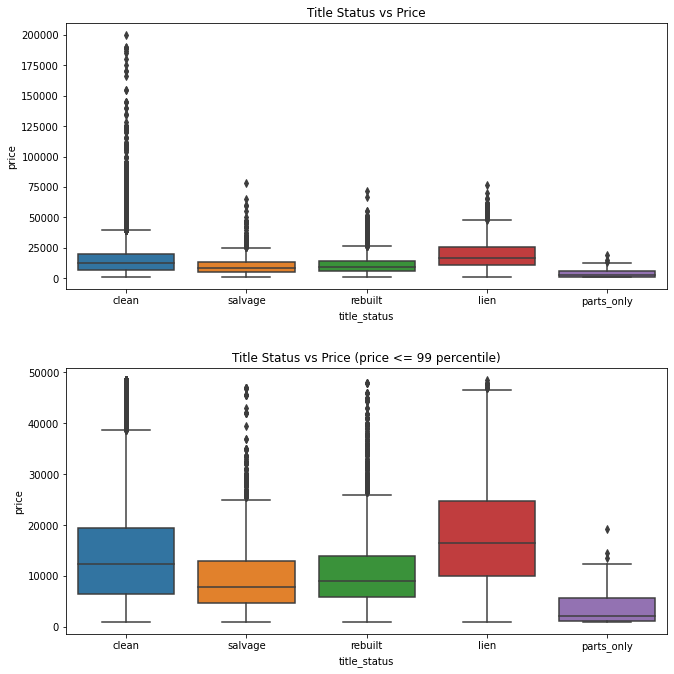

In [133]:
# Look at the relationship between price and title_status

fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="title_status", y="price", data=df_pip)
axes[0].set_title("Title Status vs Price")

sns.boxplot(ax=axes[1], x="title_status", y="price", data=df_o)
axes[1].set_title("Title Status vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

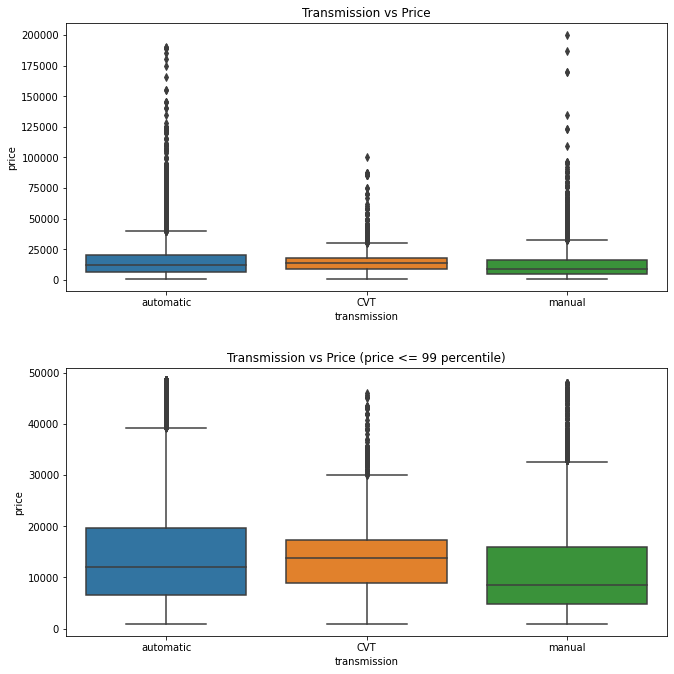

In [134]:
# Look at the relationship between price and transmission

fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="transmission", y="price", data=df_pip)
axes[0].set_title("Transmission vs Price")

sns.boxplot(ax=axes[1], x="transmission", y="price", data=df_o)
axes[1].set_title("Transmission vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

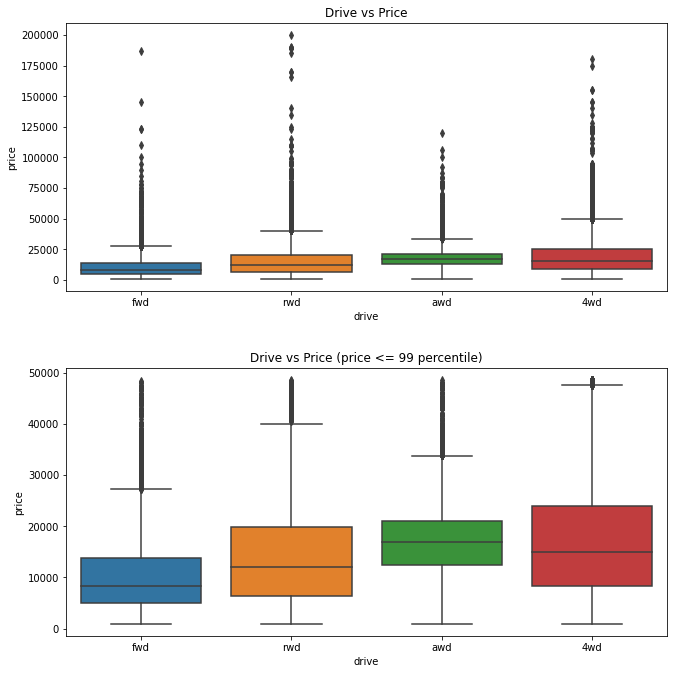

In [135]:
# Look at the relationship between price and drive

fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="drive", y="price", data=df_pip)
axes[0].set_title("Drive vs Price")

sns.boxplot(ax=axes[1], x="drive", y="price", data=df_o)
axes[1].set_title("Drive vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

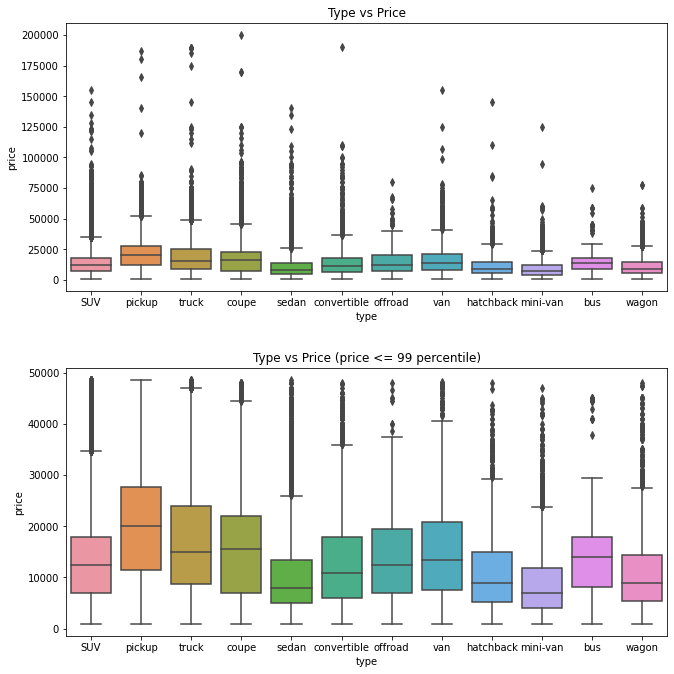

In [136]:
# Look at the relationship between price and type

fig, axes = plt.subplots(2, figsize=(10,10))

sns.boxplot(ax=axes[0], x="type", y="price", data=df_pip)
axes[0].set_title("Type vs Price")

sns.boxplot(ax=axes[1], x="type", y="price", data=df_o)
axes[1].set_title("Type vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

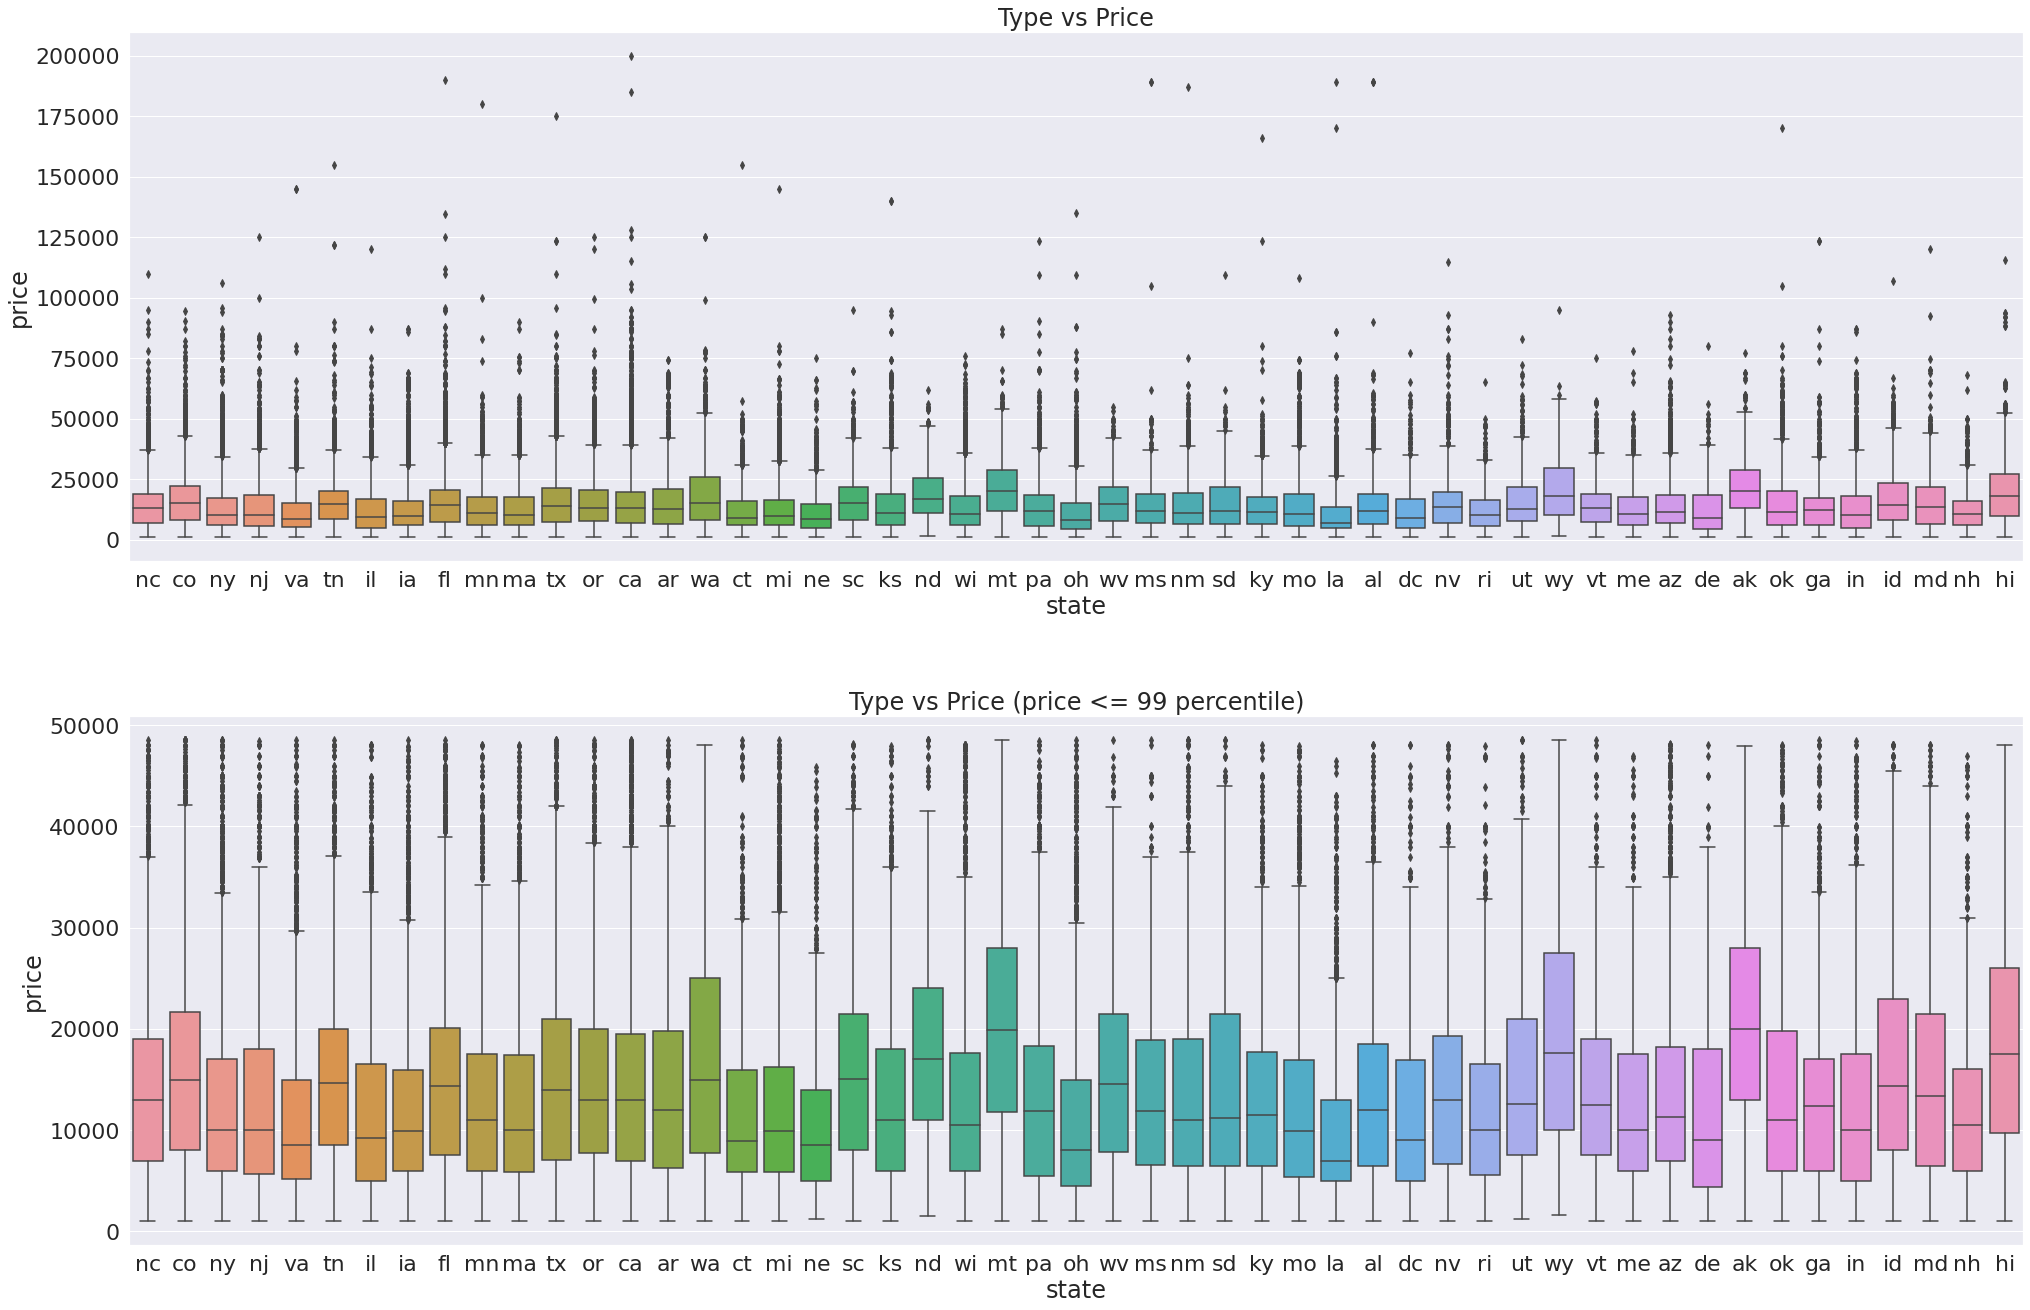

In [41]:
# Look at the relationship between price and type

fig, axes = plt.subplots(2, figsize=(30,20))

sns.boxplot(ax=axes[0], x="state", y="price", data=df_pip)
axes[0].set_title("Type vs Price")

sns.boxplot(ax=axes[1], x="state", y="price", data=df_o)
axes[1].set_title("Type vs Price (price <= 99 percentile)")

fig.tight_layout(pad=3.0)

plt.show()

In [137]:
df_o.to_csv(file_path+'cleanedvehicles_rev3.csv',index=False)

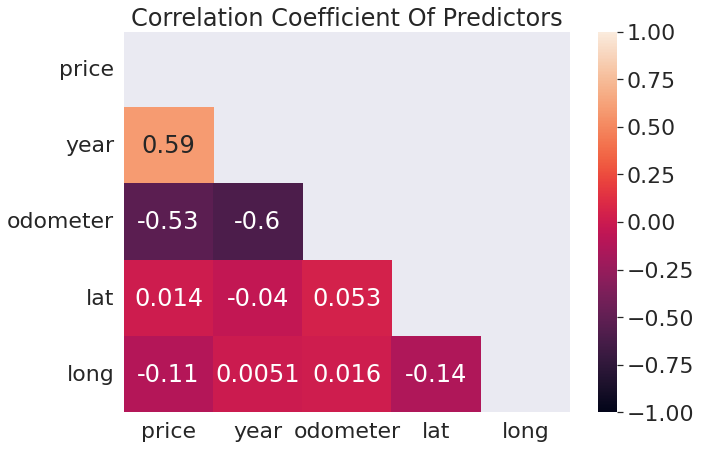

In [43]:
# finding predictive features strongly correlated to other predictive features

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot heatmap
plt.figure(figsize=(10,7))


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_o.corr(), dtype=bool))
# Generate Heatmap
sns.heatmap(df_o.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

explained_variance_ratio_: [0.56845959 0.43154041]


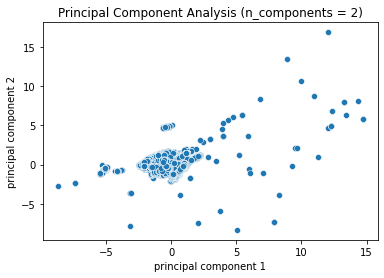

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,lat_long_pca
0,greensboro,3995,2004,honda,excellent,4_cylinders,gas,212526,clean,automatic,fwd,SUV,nc,0.934854
1,greensboro,10995,2014,chevrolet,like_new,6_cylinders,gas,112383,clean,automatic,fwd,SUV,nc,0.934854
2,greensboro,8995,2005,toyota,new,6_cylinders,gas,181020,clean,automatic,rwd,pickup,nc,0.934854
3,greensboro,7995,2008,nissan,new,6_cylinders,gas,162214,clean,automatic,fwd,pickup,nc,0.934854
4,greensboro,5495,2008,ford,like_new,6_cylinders,gas,139904,clean,automatic,awd,SUV,nc,0.934854
5,denver,7995,2010,chevrolet,excellent,8_cylinders,gas,194050,clean,automatic,4wd,truck,co,-0.634258
6,greensboro,15300,2015,honda,good,4_cylinders,gas,54296,clean,CVT,fwd,coupe,nc,0.853233
7,greensboro,16000,2011,bmw,excellent,6_cylinders,gas,85000,salvage,automatic,fwd,sedan,nc,0.801956
8,syracuse,10950,2011,buick,excellent,6_cylinders,gas,43418,clean,automatic,fwd,sedan,ny,0.124867
9,syracuse,9400,2011,bmw,good,6_cylinders,gas,145000,clean,automatic,4wd,SUV,ny,0.120183


In [138]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Scale the predictors before PCA
transformed_lat_long = StandardScaler().fit_transform(df_o[['lat', 'long']]) # without scaling, the 1st PC explains 90% of variance!
# Implement PCA
pca = PCA(n_components=2)
pca_lat_long = pca.fit_transform(transformed_lat_long)
print('explained_variance_ratio_:', pca.explained_variance_ratio_)
# 57% of lat and long's variance is explained by the first principal component.

# Visualize the principal components
sns.scatterplot(x=pca_lat_long[:, 0], y=pca_lat_long[:, 1])
plt.title('Principal Component Analysis (n_components = 2)')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()
# Given this dataset is North American, the span of latitude is wide. Less variance is explained with the first PC than other examples.
# We will try predicting with the original dataset as well as with the first principal component replacing lat and long, to see if it improves the model.

# Create a copy of the dataset with the PCA feature
df_pca = df_o.copy()
df_pca['lat_long_pca'] = pca_lat_long[:, 0]
df_pca = df_pca.drop(['lat', 'long'], axis=1)
df_pca.head(10)

explained_variance_ratio_: [0.79964476 0.20035524]


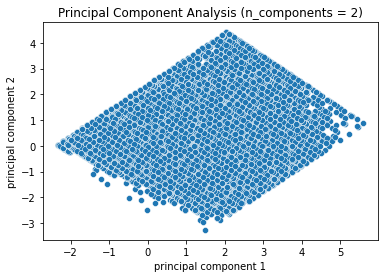

,region,price,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,type,state,lat_long_pca,odom_year_pca
0,greensboro,3995,honda,excellent,4_cylinders,gas,clean,automatic,fwd,SUV,nc,0.934854,2.201922
1,greensboro,10995,chevrolet,like_new,6_cylinders,gas,clean,automatic,fwd,SUV,nc,0.934854,-0.236507
2,greensboro,8995,toyota,new,6_cylinders,gas,clean,automatic,rwd,pickup,nc,0.934854,1.702378
3,greensboro,7995,nissan,new,6_cylinders,gas,clean,automatic,fwd,pickup,nc,0.934854,1.104542
4,greensboro,5495,ford,like_new,6_cylinders,gas,clean,automatic,awd,SUV,nc,0.934854,0.839105
5,denver,7995,chevrolet,excellent,8_cylinders,gas,clean,automatic,4wd,truck,co,-0.634258,1.233925
6,greensboro,15300,honda,good,4_cylinders,gas,clean,CVT,fwd,coupe,nc,0.853233,-1.052304
7,greensboro,16000,bmw,excellent,6_cylinders,gas,salvage,automatic,fwd,sedan,nc,0.801956,-0.188213
8,syracuse,10950,buick,excellent,6_cylinders,gas,clean,automatic,fwd,sedan,ny,0.124867,-0.682943
9,syracuse,9400,bmw,good,6_cylinders,gas,clean,automatic,4wd,SUV,ny,0.120183,0.525648


In [139]:
# Similarly, year and odometer seem to offer similar information about the wear and year of a vehicle.
# Let's similarly conduct PCA for these features.
# Start by assessing the correlation. The previous heatmap shows that year and odometer are negatively correlated.

# PCA
from sklearn.decomposition import PCA
# Scale the predictors before PCA
transformed_odom_year = StandardScaler().fit_transform(df_o[['odometer', 'year']])
# Implement PCA
pca = PCA(n_components=2)
pca_odom_year = pca.fit_transform(transformed_odom_year)
print('explained_variance_ratio_:', pca.explained_variance_ratio_)
# The first PC of odometer and year explains 64% of variance, more than the first lat long PC.

# Visualize the principal components
sns.scatterplot(x=pca_odom_year[:, 0], y=pca_odom_year[:, 1])
plt.title('Principal Component Analysis (n_components = 2)')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()
# The first principal component explains more variance for this combination of features than the previous combination.

# Add to df_pca
df_pca['odom_year_pca'] = pca_odom_year[:, 0]
df_pca = df_pca.drop(['year', 'odometer'], axis=1)
df_pca.head(10)

In [140]:
df_o.region.value_counts()

york                2381
tri-cities          1967
rochester           1961
daytona_beach       1959
ventura_county      1949
                    ... 
ogden-clearfield       8
southwest_TX           6
southwest_MS           6
kansas_city            4
st_louis               2
Name: region, Length: 403, dtype: int64

In [141]:
#Because region has 403 variables, and it is overlaped with latitude and longitude, We can try one test without it.
df_noregion=df_o.copy()
df_noregion.drop(['region'], axis=1, inplace=True)

In [142]:
df_pca_noregion = df_pca.copy()
df_pca_noregion = df_pca.drop('region', axis=1)

In [143]:
# Pipeline

import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

# Create lists of features by dtype
categorical_vars = ['region', 'manufacturer', 'condition', 'cylinders',
            'fuel', 'title_status', 'transmission', 'drive', 
            'type', 'state']

categorical_vars_noregion = ['manufacturer', 'condition', 'cylinders',
            'fuel', 'title_status', 'transmission', 'drive', 
            'type', 'state']

discrete_vars = ['year']

discrete_vars_pca = []

continuous_vars = ['odometer', 'lat','long']

continuous_vars_pca = ['odom_year_pca', 'lat_long_pca']

dep_var = ['price']

def apply_pipelines(df,
                    continuous_vars=continuous_vars,
                    categorical_vars=categorical_vars,
                    discrete_vars=discrete_vars):

  # Build categorical feature pipeline
  cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
  cat_pipe = Pipeline([cat_ohe_step])
  cat_transformers = [('cat', cat_pipe, categorical_vars)]

  # Build numerical feature pipeline
  num_scl_step = ('scl', MinMaxScaler())
  num_pipe = Pipeline([num_scl_step])
  num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

  # Implement the pipeline
  ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
  ct.fit(df[categorical_vars + discrete_vars + continuous_vars])
  X = ct.transform(df[categorical_vars + discrete_vars + continuous_vars])
  y = df[['price']].values
  
  return X, y


In [144]:
# Pipeline with no region feature
X_noregion, y_noregion = apply_pipelines(df_noregion,
                                         continuous_vars = continuous_vars,
                                         categorical_vars = categorical_vars_noregion,
                                         discrete_vars = discrete_vars)
print('X, y shape without region feature:')
print(X_noregion.shape)
print(y_noregion.shape)

# Pipeline with PCA features and no region feature
X_pca, y_pca = apply_pipelines(df_pca_noregion,
                               continuous_vars = continuous_vars_pca,
                               categorical_vars = categorical_vars_noregion,
                               discrete_vars = discrete_vars_pca)
print('X, y shape with PC features and no region:')
print(X_pca.shape)
print(y_pca.shape)

# Pipeline with region features
X, y = apply_pipelines(df_o,
                       continuous_vars = continuous_vars,
                       categorical_vars = categorical_vars,
                       discrete_vars = discrete_vars)
print('X, y shape with region feature:')
print(X.shape)
print(y.shape)

X, y shape without region feature:
(248067, 142)
(248067, 1)
X, y shape with PC features and no region:
(248067, 140)
(248067, 1)
X, y shape with region feature:
(248067, 545)
(248067, 1)


In [145]:
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.

# Feature Engineering / Selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model

# Models
from sklearn.linear_model import LinearRegression # to apply the Linear regression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor


In [146]:
# LR model evaluation

def model_evaluation(model, X, y):
  """
  Function takes a model, training data, labels and predictions, as well as testing data, labels and predictions,
  and does two things:
    1. Splits the data into training and testing sets.
    1. Trains the model and produces test predictions.
    2. Returns several model evaluation scores and compares the training and testing scores to assess overfitting.
  Args:
    model: A model
    X: data set of features for model fitting.
    y: labels for model predictions.
  Returns:
    Printout of scores for evaluating regression models.
  """

  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import r2_score
  from sklearn.model_selection import train_test_split
  import math

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

  m = model
  m.fit(X_train, y_train)
  y_pred = m.predict(X_test)

  print('MSE:', mean_squared_error(y_test, y_pred))

  print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

  print('MAE:', mean_absolute_error(y_test, y_pred))

  r2_score_num = r2_score(y_test, y_pred)
  print('R^2 Score:', f'{r2_score_num:8f}')
  # In cases where negative R^2 value arises, the mean of the data provides
  # a better fit to the outcomes than do the fitted function values.

  try:
    print('Model score ("score" method from model if applicable):', m.score(X_test, y_test))
  except:
    pass

In [147]:
print('Linear Regression model tested on different transformations of the dataset:')

print('Including region feature:')
model_evaluation(LinearRegression(), X, y)
print('\n')

print('Excluding region features:')
model_evaluation(LinearRegression(), X_noregion, y_noregion)
print('\n')

print('Including PCA features, excluding region:')
model_evaluation(LinearRegression(), X_pca, y_pca)

Linear Regression model tested on different transformations of the dataset:
Including region feature:
MSE: 6.483730962741589e+24
RMSE: 2546317137110.299
MAE: 9333937673.79362
R^2 Score: -74450490073725184.000000
Model score ("score" method from model if applicable): -7.445049007372518e+16


Excluding region features:
MSE: 21347559.10814152
RMSE: 4620.34188217079
MAE: 3339.534553419062
R^2 Score: 0.754873
Model score ("score" method from model if applicable): 0.7548731977603657


Including PCA features, excluding region:
MSE: 21580712.499952972
RMSE: 4645.504547404186
MAE: 3354.2004944840837
R^2 Score: 0.752196
Model score ("score" method from model if applicable): 0.7521959762065314


In [148]:
from sklearn.linear_model import Lasso

print('Lasso Regression model tested on different transformations of the dataset:')

print('Including region feature:')
model_evaluation(Lasso(alpha=2, random_state=0), X, y)
print('\n')

print('Excluding region features:')
model_evaluation(Lasso(alpha=2, random_state=0), X_noregion, y_noregion)
print('\n')

print('Including PCA features, excluding region:')
model_evaluation(Lasso(alpha=2, random_state=0), X_pca, y_pca)


Lasso Regression model tested on different transformations of the dataset:
Including region feature:
MSE: 21291134.589112654
RMSE: 4614.23174419238
MAE: 3334.424677957927
R^2 Score: 0.755521
Model score ("score" method from model if applicable): 0.7555211014315718


Excluding region features:
MSE: 21439518.71129028
RMSE: 4630.282789559433
MAE: 3347.318550031768
R^2 Score: 0.753817
Model score ("score" method from model if applicable): 0.7538172567349355


Including PCA features, excluding region:
MSE: 21662532.276256867
RMSE: 4654.302555298363
MAE: 3360.7184098808148
R^2 Score: 0.751256
Model score ("score" method from model if applicable): 0.7512564673838255


In [149]:
from sklearn.svm import SVR, LinearSVR

print('LinearSVR model tested on different transformations of the dataset:')

print('Including region feature:')
model_evaluation(LinearSVR(random_state=0), X, y.ravel())
print('\n')

print('Excluding region features:')
model_evaluation(LinearSVR(random_state=0), X_noregion, y_noregion.ravel())
print('\n')

print('Including PCA features, excluding region:')
model_evaluation(LinearSVR(random_state=0), X_pca, y_pca.ravel())

LinearSVR model tested on different transformations of the dataset:
Including region feature:
MSE: 34217044.73581833
RMSE: 5849.53371952144
MAE: 4088.135752607209
R^2 Score: 0.607097
Model score ("score" method from model if applicable): 0.6070972463084626


Excluding region features:
MSE: 34366304.456126556
RMSE: 5862.278094403792
MAE: 4106.920800247314
R^2 Score: 0.605383
Model score ("score" method from model if applicable): 0.6053833474145893


Including PCA features, excluding region:
MSE: 45617905.553027086
RMSE: 6754.102868111137
MAE: 4884.714789625164
R^2 Score: 0.476185
Model score ("score" method from model if applicable): 0.47618501691752957


In [150]:
from sklearn.ensemble import ExtraTreesRegressor 

print('ExtraTreesRegressor model tested on different transformations of the dataset:')

#print('Including region feature:')
#model_evaluation(ExtraTreesRegressor(random_state=0), X, y.ravel())
print('\n')

print('Excluding region features:')
model_evaluation(ExtraTreesRegressor(random_state=0), X_noregion, y_noregion.ravel())
print('\n')

#print('Including PCA features, excluding region:')
#model_evaluation(ExtraTreesRegressor(random_state=0), X_pca, y_pca.ravel())


ExtraTreesRegressor model tested on different transformations of the dataset:


Excluding region features:
MSE: 6662982.512559979
RMSE: 2581.2753655044203
MAE: 1367.840875468221
R^2 Score: 0.923491
Model score ("score" method from model if applicable): 0.923491224996326




In [151]:
print('Including PCA features, excluding region:')
model_evaluation(ExtraTreesRegressor(random_state=0), X_pca, y_pca.ravel())

Including PCA features, excluding region:
MSE: 8723675.68036838
RMSE: 2953.5869176931938
MAE: 1567.9448889713753
R^2 Score: 0.899829
Model score ("score" method from model if applicable): 0.8998289822048637


In [152]:
print('Including region feature:')
model_evaluation(ExtraTreesRegressor(random_state=0), X, y.ravel())

Including region feature:
MSE: 6967452.660704268
RMSE: 2639.5932756211264
MAE: 1447.0792935156765
R^2 Score: 0.919995
Model score ("score" method from model if applicable): 0.9199950972463589
